<a href="https://colab.research.google.com/github/aaguil8a/Tabular-Playground-Series---Oct-2021/blob/main/Copy_of_SecondIdea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

In [35]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pydotplus
from scipy.cluster import hierarchy
import seaborn as sns
from sklearn import decomposition, preprocessing, cluster, tree
from yellowbrick.cluster.silhouette import SilhouetteVisualizer


import io
import urllib.request as req
import zipfile

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
filename = 'https://raw.githubusercontent.com/aaguil8a/DS/main/student-mat.csv'

df = pd.read_csv(filename)

In [3]:
df.head(50)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [4]:
df.shape

(395, 33)

In [5]:
# 1) This data is from Kaggle
# 2) 'This data set consists of the marks secured by the students in various subjects(kaggle).'
# 3) ' The target is G3 which is finial exam.
# 4) There are 33 features
# 5) There 395 rows.
# 6) The dataset is small.

In [6]:
print(df.duplicated().sum()) # There is no duplicates rows

0


In [7]:
((df
  .isna()
  .mean()
  * 100)
  .pipe(lambda ser : ser[ser > 0])
)

# There are no missing values

Series([], dtype: float64)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [49]:
df.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [9]:
df.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

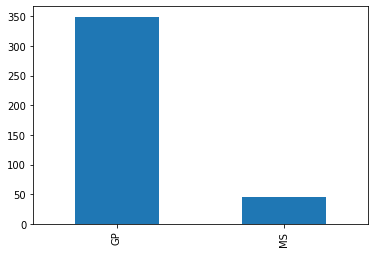

In [10]:
df.school.value_counts().plot(kind='bar')

In [11]:
df.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [12]:
df.select_dtypes(include=[object]).nunique()

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

In [13]:
df.guardian.value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

In [14]:
df.select_dtypes(include=['int64']).nunique()

age            8
Medu           5
Fedu           5
traveltime     4
studytime      4
failures       4
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [15]:
df.traveltime.value_counts()

1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64

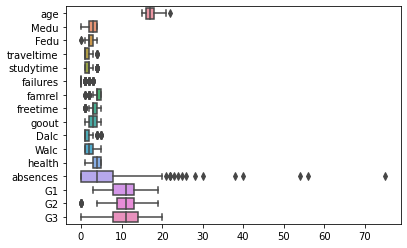

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df,orient = "h");

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f274c7710>,
      dtype=object)

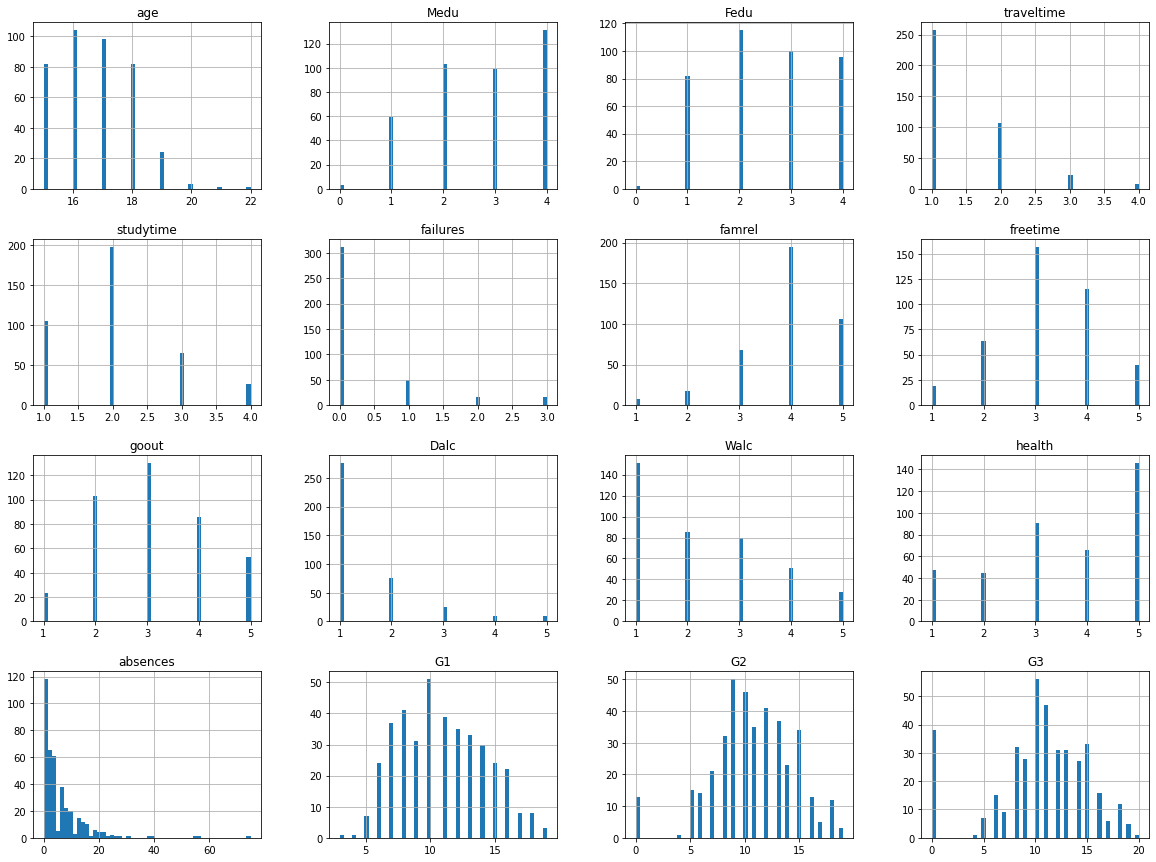

In [17]:
df.hist(bins=50,figsize=(20,15))


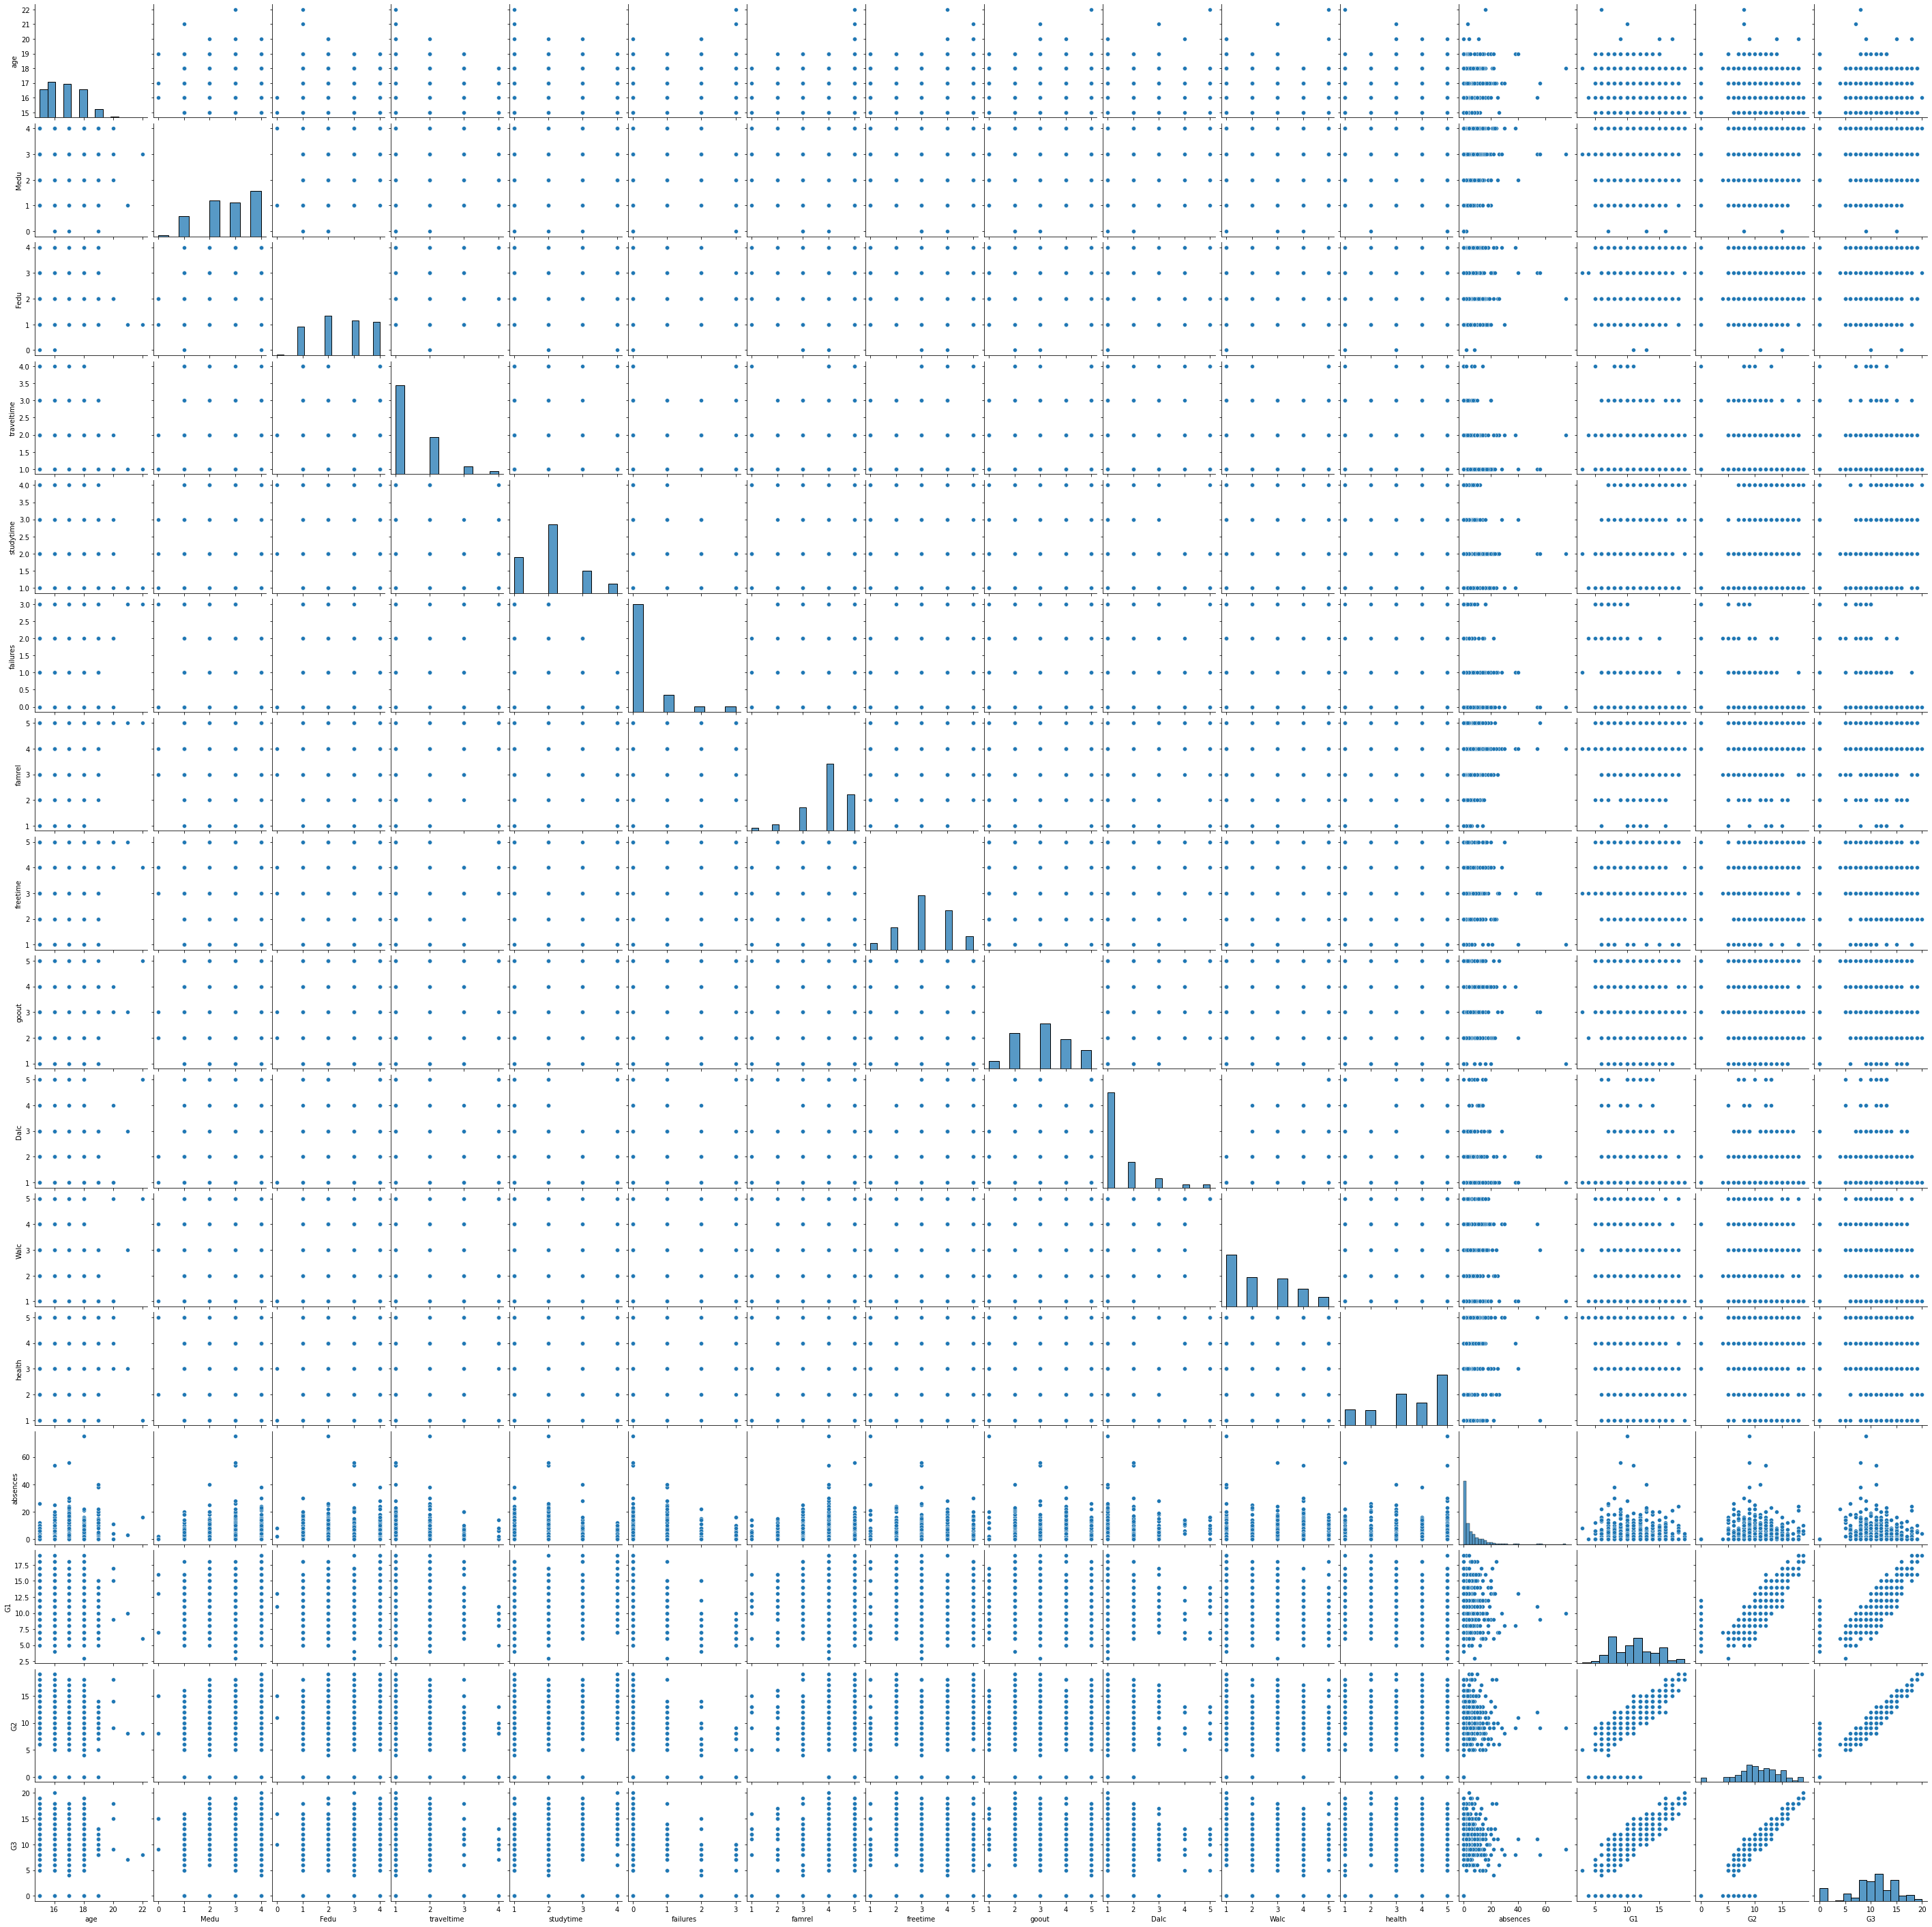

In [18]:
sns.pairplot(df)

In [19]:
# We see that both in failures & absences we have most outliers.

In [20]:
(df
 .corr(method='spearman')
 .style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.161294,-0.149596,0.109804,0.031557,0.236464,0.031380,0.000302,0.140131,0.097073,0.132799,-0.075150,0.149276,-0.057630,-0.167622,-0.173438
Medu,-0.161294,1.000000,0.631577,-0.147849,0.063498,-0.242373,0.012361,0.028493,0.064954,0.022729,-0.044332,-0.035686,0.097562,0.209662,0.236354,0.225036
Fedu,-0.149596,0.631577,1.000000,-0.154454,0.018429,-0.236616,0.011400,-0.017132,0.047961,0.003994,-0.014486,0.018113,0.003568,0.194737,0.194844,0.170049
traveltime,0.109804,-0.147849,-0.154454,1.000000,-0.105969,0.079917,-0.038656,-0.022279,-0.001430,0.066477,0.063654,-0.015452,-0.025061,-0.085501,-0.123795,-0.120530
studytime,0.031557,0.063498,0.018429,-0.105969,1.000000,-0.157633,0.058141,-0.131321,-0.065979,-0.217904,-0.264021,-0.091497,-0.046180,0.162286,0.129160,0.105170
failures,0.236464,-0.242373,-0.236616,0.079917,-0.157633,1.000000,-0.051389,0.088058,0.105419,0.187492,0.127912,0.079688,0.096028,-0.346052,-0.362357,-0.361224
famrel,0.031380,0.012361,0.011400,-0.038656,0.058141,-0.051389,1.000000,0.143142,0.063549,-0.106338,-0.116060,0.085341,-0.086577,0.026433,0.008165,0.054977
freetime,0.000302,0.028493,-0.017132,-0.022279,-0.131321,0.088058,0.143142,1.000000,0.285182,0.194223,0.130246,0.088975,0.013397,0.006973,-0.016765,-0.004994
goout,0.140131,0.064954,0.047961,-0.001430,-0.065979,0.105419,0.063549,0.285182,1.000000,0.255146,0.393333,-0.018541,0.133280,-0.151636,-0.160985,-0.166119
Dalc,0.097073,0.022729,0.003994,0.066477,-0.217904,0.187492,-0.106338,0.194223,0.255146,1.000000,0.639906,0.095139,0.129651,-0.111438,-0.110086,-0.120944


In [21]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


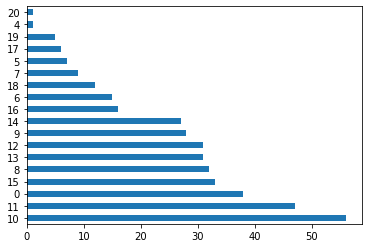

In [22]:
df.G3.value_counts().plot.barh()

In [23]:
df.G3.quantile(.99)

19.0

In [24]:
df.G3.quantile([.6, .8])

0.6    12.0
0.8    14.0
Name: G3, dtype: float64

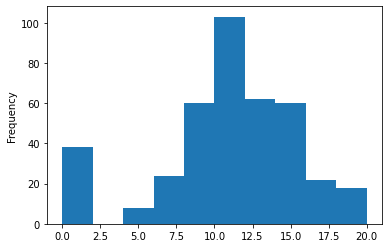

In [25]:
df.G3.plot.hist()

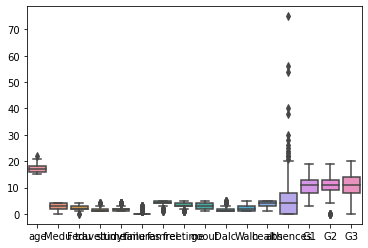

In [26]:
sns.boxplot(data=df)

In [27]:
df.G3.corr(df.absences)

0.03424731615006931

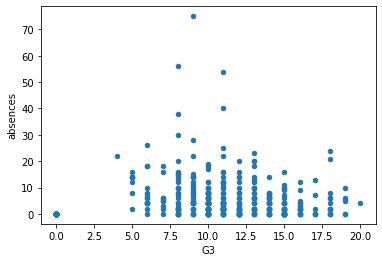

In [28]:
df.plot.scatter(x='G3', y='absences')

In [29]:
def tweak_kag2(df):
    df = pd.get_dummies(df, drop_first=True)
    cols = [c.replace(' ', '_') for c in df.columns]
    df.columns = cols
    return df
    
df = tweak_kag2(df)
df.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0


In [33]:
df.isna().any()

age                  False
Medu                 False
Fedu                 False
traveltime           False
studytime            False
failures             False
famrel               False
freetime             False
goout                False
Dalc                 False
Walc                 False
health               False
absences             False
G1                   False
G2                   False
G3                   False
school_MS            False
sex_M                False
address_U            False
famsize_LE3          False
Pstatus_T            False
Mjob_health          False
Mjob_other           False
Mjob_services        False
Mjob_teacher         False
Fjob_health          False
Fjob_other           False
Fjob_services        False
Fjob_teacher         False
reason_home          False
reason_other         False
reason_reputation    False
guardian_mother      False
guardian_other       False
schoolsup_yes        False
famsup_yes           False
paid_yes             False
a

In [37]:
X = df
std = preprocessing.StandardScaler()
                        
X_std = pd.DataFrame(std.fit_transform(X), columns=X.columns)

In [38]:
# instance model
pca = decomposition.PCA()

# recoginize ehat embeddging are

pca_X = pd.DataFrame(pca.fit_transform(X_std), columns=[f'PC{i+1}' for i in range(len(X.columns))])
pca_X



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42
0,0.362968,-0.662011,-2.619059,-0.150514,-1.909049,1.195931,2.974020,-0.316236,2.800774,-0.828876,1.137751,-0.088371,-0.360996,3.042613,-1.072651,-1.742326,-0.237566,0.105362,-0.384918,0.694889,-0.304597,0.386173,-1.180852,-0.990967,-0.497876,-0.557965,-0.174638,-0.267643,-1.236639,-1.550694,0.286381,0.161630,0.152182,-0.717595,-0.778343,-0.574249,0.424692,0.119356,-0.868695,0.796581,-0.314136,-0.148982
1,2.272260,-2.353466,-0.486152,0.197988,0.124527,-1.114177,-0.036379,0.915729,-0.800651,0.684950,-0.200578,-0.522105,-0.896360,0.287153,-1.241850,0.163991,0.817678,0.390427,-0.616031,-1.122960,-1.226973,0.113658,-0.922485,-0.346324,-0.239496,0.419427,0.501354,0.403539,1.019542,-0.951689,0.133989,-0.982591,-0.596278,1.356727,-0.545692,-0.499628,-0.303147,0.575229,-0.717926,0.407654,-0.020569,-0.253189
2,2.134215,-0.595323,-0.546596,-0.383888,-0.625077,-1.435721,-0.671970,-2.887273,0.756880,0.794289,-0.233153,0.068709,-0.934967,0.804284,-0.892040,2.612661,0.312456,1.731918,-0.461272,1.263998,0.591671,-0.582788,-0.784594,0.334731,-1.602617,-1.231511,-2.505901,-0.650769,0.481157,1.868842,-0.580950,0.932726,-0.156257,0.890599,-0.738137,0.733610,1.081509,0.635221,-0.049695,0.477748,0.119776,-0.334841
3,-3.207328,-0.840273,-0.535223,1.618167,0.431047,-0.525111,0.209780,-1.433193,-1.580663,1.898388,-1.285340,-0.012730,0.511925,-1.934666,1.740690,-1.053627,-1.488457,-0.317349,0.124340,0.351880,0.423355,1.719085,-0.563055,0.056870,-0.021682,-0.824374,-0.430139,-0.273786,-0.460032,-0.146501,0.301392,0.680508,-0.210789,-0.412657,0.282420,0.106622,-0.882868,-0.093166,0.167804,0.065457,0.265401,-0.292328
4,0.436561,-2.080756,-0.533011,-0.794434,0.673129,-0.282411,1.556725,-0.077447,-0.682180,1.688506,1.149069,-1.156523,0.313518,0.159105,0.187414,-0.414550,0.757410,-0.835298,-0.109701,-0.286417,1.809560,-0.548655,-0.550425,0.211709,0.766150,0.236552,1.088149,0.123999,0.014738,0.310405,-0.962971,1.237310,-0.165245,0.572237,0.074861,-0.403721,0.111370,-0.379755,-0.792786,0.034590,-0.113765,0.150526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,3.261966,4.063761,0.930748,2.941939,2.235787,0.400280,-0.669355,-0.256155,1.666233,-0.644260,1.781076,-2.837164,1.742632,2.628490,-1.321411,0.029899,1.089633,-0.221005,-0.393043,-0.501172,2.079853,1.311276,-0.135778,0.693989,0.635363,-0.972489,-0.187273,0.254871,-0.379221,-0.098258,1.021557,0.204790,-0.084737,0.312493,-1.246473,1.059604,-0.484825,-0.305729,0.006371,-0.266265,-0.075094,-0.091332
391,0.382804,3.842508,3.002182,0.421148,-0.852207,-0.442644,-1.079103,-1.866233,-0.479668,-0.320770,0.692363,0.672857,0.142909,0.191456,-2.363510,-0.952532,-0.908469,0.910703,0.640792,-0.976215,-1.941220,0.314993,0.528748,1.419197,-0.064629,0.428446,0.518722,0.200473,-0.339583,-0.430429,1.053460,0.524789,1.066785,-0.346702,0.130384,-0.120909,-1.173774,-0.336962,-0.038553,0.259895,-0.239689,-0.027686
392,5.957951,1.209704,3.406842,1.180817,1.098868,1.178373,0.543701,3.060241,0.805094,0.960671,0.592323,-1.081548,0.191925,1.253099,-1.530974,-0.761008,1.632395,0.764552,-0.505504,0.710912,0.609319,0.235384,0.636983,1.500171,0.277389,-1.145161,-1.379648,-0.954110,0.534127,0.908203,0.458465,-0.095131,-0.206776,-0.084069,-0.930966,-0.059588,-0.442740,0.122211,0.253351,-0.424192,-0.005453,-0.068126
393,1.925630,2.292021,2.787432,-0.967631,-1.941905,1.128726,-0.658579,-0.163055,0.332866,-0.040284,1.122767,-1.910235,0.304309,-1.100145,-0.421796,0.455530,-0.264927,0.565802,-1.133836,-1.863415,-2.147135,-0.663651,1.046516,1.069803,-0.385126,-0.954620,0.160830,-0.360490,0.591402,-0.757259,0.290084,0.779826,-0.896948,-1.071696,-0.106116,-0.178512,0.039619,-0.776078,-0.005953,0.123103,-0.423548,0.220632


In [39]:
pca.explained_variance_ratio_

array([0.09777103, 0.06322298, 0.05570385, 0.05053266, 0.04298473,
       0.04052156, 0.03850187, 0.03557148, 0.03440282, 0.03330945,
       0.0316871 , 0.03012454, 0.02839306, 0.0267983 , 0.02583115,
       0.02442318, 0.02387036, 0.02276883, 0.02231159, 0.02139721,
       0.01995302, 0.01903113, 0.01809381, 0.01782657, 0.01685674,
       0.01602041, 0.01536208, 0.0150761 , 0.01395535, 0.01277409,
       0.01220768, 0.01169586, 0.01109915, 0.00985239, 0.00914699,
       0.0076734 , 0.00743747, 0.00593721, 0.0036781 , 0.00267744,
       0.00188084, 0.00163642])

In [40]:
pca.components_[0]

array([ 0.20028442, -0.29216839, -0.25979943,  0.15681502, -0.13589621,
        0.28088584, -0.00809141,  0.04298861,  0.09430011,  0.1240115 ,
        0.14226682,  0.04565119,  0.02692621, -0.34202126, -0.35695893,
       -0.34540131,  0.13329656,  0.01580979, -0.12633195, -0.00696791,
        0.03572333, -0.12115595,  0.15503401, -0.04756045, -0.15948596,
       -0.10053458,  0.1119091 ,  0.00118272, -0.13402863,  0.01864949,
        0.01191914, -0.10147926, -0.05670954,  0.1273878 ,  0.00122038,
       -0.0943663 , -0.1268919 , -0.07941135, -0.1275729 , -0.18621161,
       -0.11898877,  0.05634136])

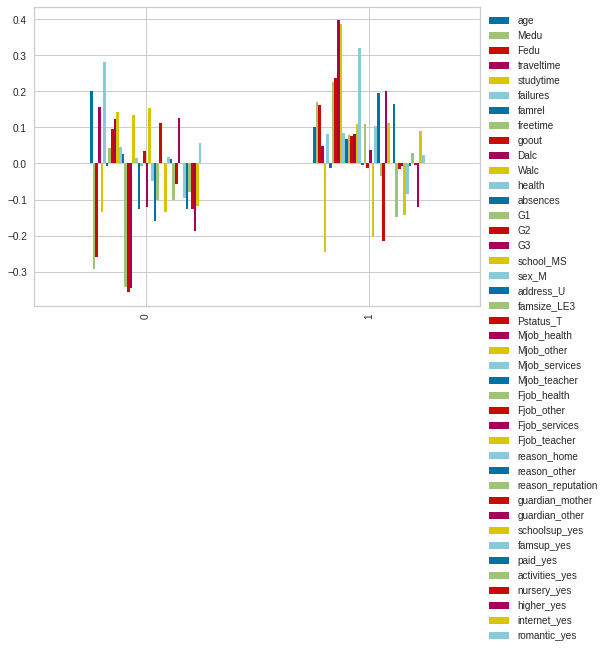

In [41]:
# What columns make up the components 1 & 2?
(pd.DataFrame(pca.components_, columns=X.columns)
 .iloc[:2]
 .plot.bar()
 .legend(bbox_to_anchor=(1,1)))

Pstatus_t

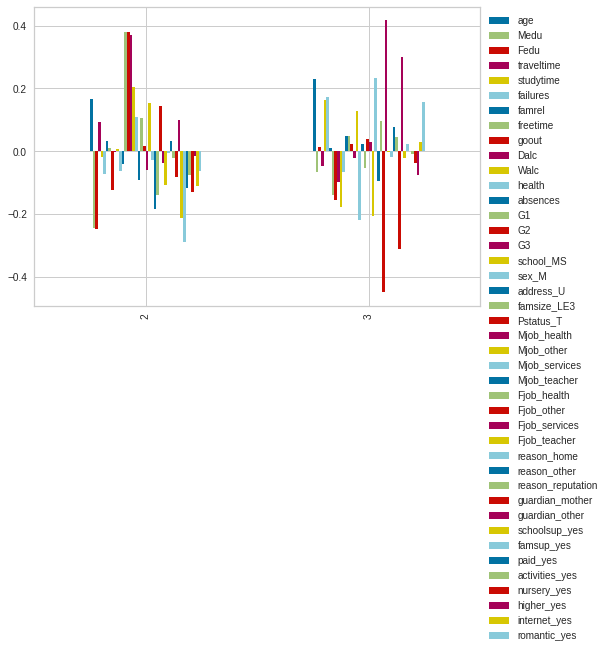

In [42]:
# What columns make up the components 3 & 4?
(pd.DataFrame(pca.components_, columns=X.columns)
 .iloc[2:4]
 .plot.bar()
 .legend(bbox_to_anchor=(1,1)))

Dalc

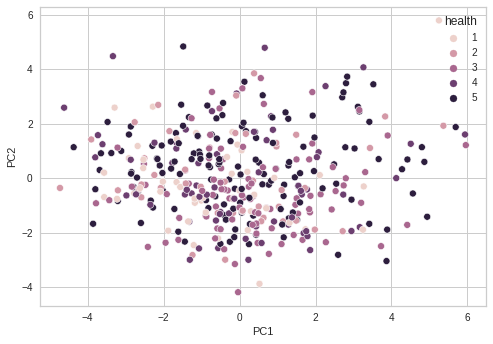

In [44]:
sns.scatterplot(x='PC1', y='PC2', 
                data=pca_X.assign(health=X.health), 
                hue='health')

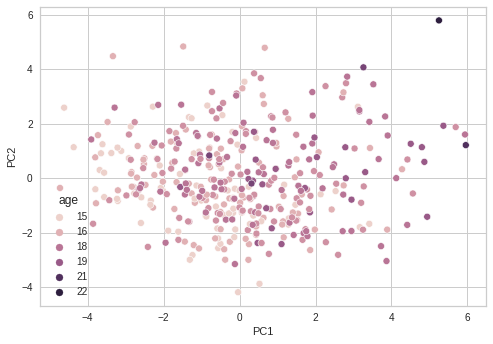

In [47]:
sns.scatterplot(x='PC1', y='PC2', 
                data=pca_X.assign(age=X.age), 
                hue=)

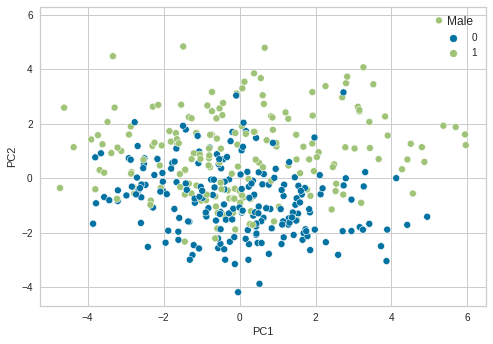

In [51]:

# Plot with Seaborn
sns.scatterplot(x='PC1', y='PC2', 
                data=pca_X.assign(Male=X.sex_M),
                hue='Male')

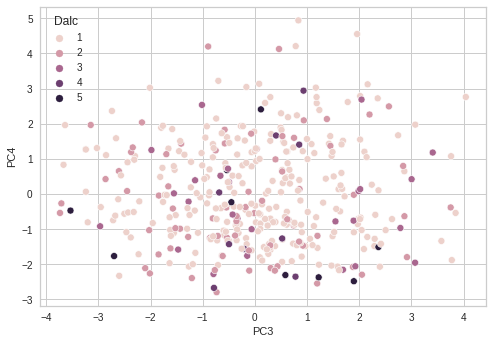

In [52]:
sns.scatterplot(x='PC3', y='PC4', 
                data=pca_X.assign(Dalc=X.Dalc),
                hue='Dalc')

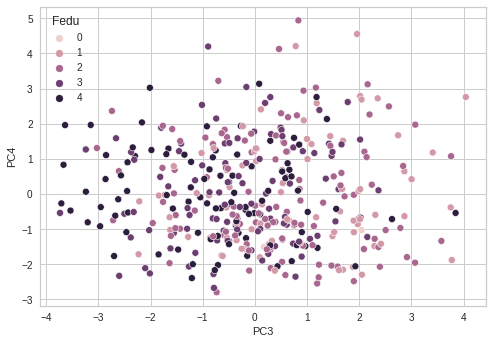

In [53]:
sns.scatterplot(x='PC3', y='PC4', 
                data=pca_X.assign(Fedu=X.Fedu),
                hue='Fedu')

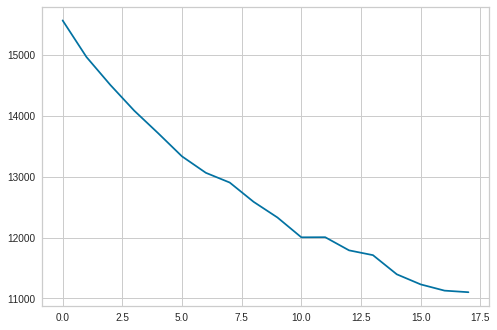

In [54]:
inerts = []
for i in range(2, 20):
    k = cluster.KMeans(n_clusters=i, random_state=42)
    k.fit(X_std)
    inerts.append(k.inertia_)
    
pd.Series(inerts).plot()


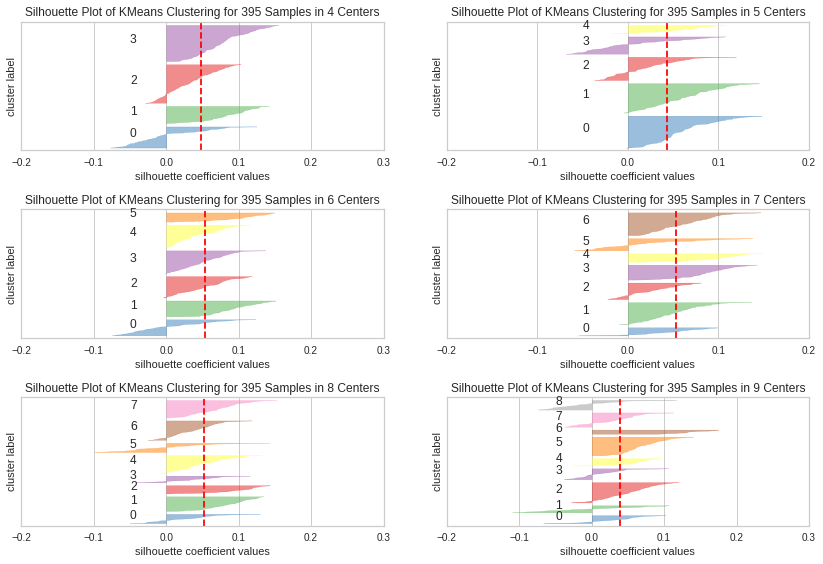

In [55]:
start, end = 4, 10
cols = 2
rows = ((end - start) // cols)
fix, axes = plt.subplots(rows, cols, figsize=(12,8))
axes = axes.reshape(cols * rows)
for i, k in enumerate(range(start, end), 0):
    ax = axes[i]
    sil = SilhouetteVisualizer(cluster.KMeans(n_clusters=k, random_state=42), ax=ax)
    sil.fit(X_std)
    sil.finalize()
plt.tight_layout()

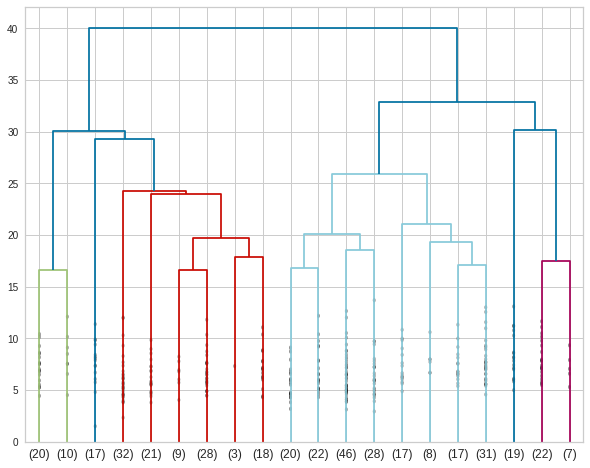

In [56]:
fig, ax = plt.subplots(figsize=(10,8))
hierarchy.dendrogram(hierarchy.linkage(X_std, method='ward'),
                    truncate_mode='lastp', p=20, show_contracted=True)
pass  # here to hide return value of above

In [62]:
k5 = cluster.KMeans(n_clusters=5, random_state=42)
k5.fit(X_std)
labels = k5.predict(X_std)

In [63]:

X.assign(label=labels).iloc[:5,-3:]

,internet_yes,romantic_yes,label
0,0,0,1
1,1,0,1
2,1,0,1
3,1,1,0
4,0,0,1


In [64]:
(X.assign(label=labels)
  .groupby('label')
  .agg(['mean', 'var'])
  .T
)

label                      0          1          2          3          4
age          mean  16.500000  16.152381  16.409639  17.451613  18.516129
             var    1.172566   0.995788   1.220394   1.104178   1.924731
Medu         mean   2.842105   2.419048   3.879518   1.870968   2.258065
             var    1.001397   0.880403   0.107258   0.802750   1.197849
Fedu         mean   2.578947   2.342857   3.409639   1.725806   2.129032
...                      ...        ...        ...        ...        ...
higher_yes   var    0.000000   0.000000   0.012048   0.202274   0.062366
internet_yes mean   0.894737   0.771429   0.939759   0.709677   0.774194
             var    0.095016   0.178022   0.057302   0.209413   0.180645
romantic_yes mean   0.307018   0.323810   0.313253   0.338710   0.516129
             var    0.214641   0.221062   0.217749   0.227657   0.258065

[84 rows x 5 columns]

In [65]:
# how many in each cluster?
pd.Series(labels).value_counts().sort_index()

0    114
1    105
2     83
3     62
4     31
dtype: int64

In [66]:
# Add coloring to aid impact to clusters
(X.assign(label=labels)
  .groupby('label')
  .mean()
  .T
 .style.background_gradient(cmap='RdBu', axis=1)
)

label,0,1,2,3,4
age,16.500000,16.152381,16.409639,17.451613,18.516129
Medu,2.842105,2.419048,3.879518,1.870968,2.258065
Fedu,2.578947,2.342857,3.409639,1.725806,2.129032
traveltime,1.385965,1.295238,1.337349,1.903226,1.580645
studytime,2.315789,2.133333,1.891566,1.483871,2.161290
failures,0.070175,0.304762,0.072289,0.838710,1.096774
famrel,4.070175,3.895238,3.843373,3.870968,4.064516
freetime,3.061404,3.019048,3.469880,3.500000,3.451613
goout,2.850877,3.000000,3.361446,3.451613,3.064516
Dalc,1.228070,1.133333,1.819277,2.032258,1.580645


In [68]:
# describe a column for each label
(X.assign(label=labels)
  .groupby('label')
  .G3
  .describe()
)

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,114.0,13.842105,2.907357,0.0,12.0,14.0,15.0,20.0
1,105.0,7.952381,3.883845,0.0,6.0,9.0,11.0,15.0
2,83.0,11.433735,3.673215,0.0,10.0,11.0,14.0,19.0
3,62.0,7.645161,4.729041,0.0,5.0,9.0,10.0,16.0
4,31.0,8.967742,4.736270,0.0,8.0,9.0,11.5,18.0


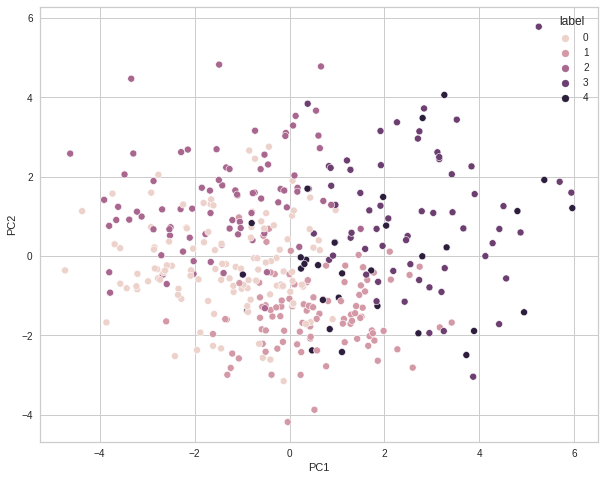

In [69]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', 
                data=pca_X.assign(label=labels),
                cmap='Pastel',
                hue='label', ax=ax)

In [70]:
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show

def bokeh_scatter(
    x,
    y,
    data,
    hue=None,
    label_cols=None,
    size=None,
    legend=None,
    alpha=0.5,
):
    """
    x - x column name to plot
    y - y column name to plot
    data - pandas dataframe
    hue - column name to color by (numeric)
    legend - column name to label by
    label_cols - columns to use in tooltip (None all in dataframe)
    size - size of points in screen space unigs
    alpha - transparency
    """
    output_notebook()
    circle_kwargs = {}
    if legend:
        circle_kwargs["legend"] = legend
    if size:
        circle_kwargs["size"] = size
    if hue:
        color_seq = data[hue]
        mapper = models.LinearColorMapper(
            palette=palettes.viridis(256),
            low=min(color_seq),
            high=max(color_seq),
        )
        circle_kwargs[
            "fill_color"
        ] = transform.transform(hue, mapper)
    ds = models.ColumnDataSource(data)
    if label_cols is None:
        label_cols = data.columns
    tool_tips = sorted(
        [
            (x, "@{}".format(x))
            for x in label_cols
        ],
        key=lambda tup: tup[0],
    )
    hover = models.HoverTool(
        tooltips=tool_tips
    )
    fig = figure(
        tools=[
            hover,
            "pan",
            "zoom_in",
            "zoom_out",
            "reset",
        ],
        toolbar_location="below",
    )

    fig.circle(
        x,
        y,
        source=ds,
        alpha=alpha,
        **circle_kwargs
    )
    show(fig)
    return fig

res = bokeh_scatter("PC1","PC2", 
                    data=pd.concat([pca_X, X], axis=1).assign(label=labels), hue='label', size=10,
                    label_cols=list(X.columns)+['label'],
                   legend='label')

In [71]:
dt = tree.DecisionTreeClassifier()
dt.fit(X, labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
for col, val in sorted(
    zip(X.columns, dt.feature_importances_),
    key=lambda col_val: col_val[1],
    reverse=True):
    print(f'{col:20}{val:10.3f}')

Mjob_teacher             0.136
G3                       0.127
guardian_other           0.121
sex_M                    0.075
Walc                     0.066
G1                       0.058
Medu                     0.046
school_MS                0.041
Fedu                     0.039
Mjob_health              0.038
G2                       0.038
studytime                0.029
reason_reputation        0.025
absences                 0.020
Mjob_services            0.016
paid_yes                 0.015
higher_yes               0.013
address_U                0.012
age                      0.010
freetime                 0.009
Dalc                     0.009
goout                    0.008
famsup_yes               0.007
Fjob_other               0.007
activities_yes           0.007
Fjob_health              0.006
famsize_LE3              0.005
Mjob_other               0.004
reason_other             0.004
guardian_mother          0.004
romantic_yes             0.003
schoolsup_yes            0.003
failures

In [73]:
print(tree.export_text(dt, feature_names=list(X.columns)))

|--- Mjob_teacher <= 0.50
|   |--- G3 <= 13.50
|   |   |--- guardian_other <= 0.50
|   |   |   |--- sex_M <= 0.50
|   |   |   |   |--- school_MS <= 0.50
|   |   |   |   |   |--- G1 <= 9.50
|   |   |   |   |   |   |--- Walc <= 4.50
|   |   |   |   |   |   |   |--- higher_yes <= 0.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- higher_yes >  0.50
|   |   |   |   |   |   |   |   |--- failures <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- failures >  1.50
|   |   |   |   |   |   |   |   |   |--- Fedu <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Fedu >  3.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Walc >  4.50
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- G1 >  9.50
|   |   |   |   |   |   |--- Mjob_services <= 0.50
|   |   |   |   |   |   |   |--- Mjob_health <= 0.50
|   |   |   |   |   |